Explore mechanism

## 1 - Mechaism exploration
- [] run 5-10 time exploratory: relationship between 
        iv: agent number/average neighbor ; dv percentage infected
        iv: re-wireing factor (->clustering co-efficient) +  dv: and infection time 
- [] noise, sentivity


In [280]:
#intial condition for  iv: agent number/average neighbor ; dv percentage infected
agent_num = 100
average_neighbor = 4
agent_neighbor = average_neighbor/agent_num

rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(agent_num, average_neighbor,0.6, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)

avg_pct_inf= sum(inf_percentage)/len(inf_percentage)

(agent_neighbor,avg_pct_inf)

(0.04, 0.05019999999999997)

In [307]:
#run 20 times of the  iv: agent number/average neighbor ; dv percentage infected and have scatter plot
import random

def explore_percentage_infected():
    agent_neighbor_list = []
    avg_pct_inf_list = []
    
    for i in range(10):
        agent_num = 100
        average_neighbor = random.randint(1,101)
        agent_neighbor = average_neighbor/agent_num
        
        rounds = []
        inf_percentage = []
        
        for i in range (100):
            inf = batch_run(agent_num, average_neighbor,0.6, 0.8, 2)[0]
            #find out how many round
            round_num = len(inf)-1
            rounds.append(round_num)
            #find out percentage
            largest_inf = inf[len(inf)-1]
            percentage= largest_inf/100 #we have 100 agent right now
            inf_percentage.append(percentage)

            avg_pct_inf= sum(inf_percentage)/len(inf_percentage)

            agent_neighbor_list.append(agent_neighbor)
            avg_pct_inf_list.append(avg_pct_inf)
        
    return(agent_neighbor_list,avg_pct_inf_list)

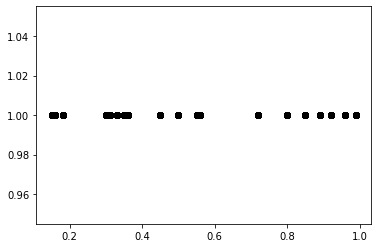

In [305]:
lis = explore_percentage_infected()

plt.plot(lis[0], lis[1], 'o', color='black'); 

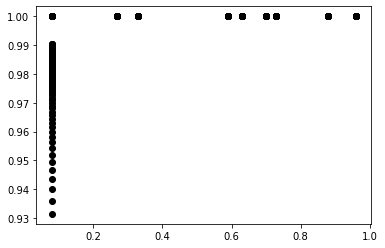

In [308]:
lis = explore_percentage_infected()

plt.plot(lis[0], lis[1], 'o', color='black'); 

In [ ]:
# second iv: re-wireing factor (->clustering co-efficient) +  dv: and infection time 

# Appendix - legacy code

## 1- batch run code

In [10]:


def run_rumor_simulation(network_size = 100 ,average_path=10,rewire=0.6, patient_zero_percentage=1,treshold_index=2):
    ########## making graph ###########
    #make a graph
    ws = ns.make_ws_graph(network_size,average_path,rewire)
    #initialize a network of agent
    ws_di = initialize_network_agent(ws)
    #initialize treshold
    
    for i in range(network_size):
        ws_di.get(i).change_tresh(treshold_index)
    
    #seed the rumor
    initialize_patient_zero(ws,ws_di,patient_zero_percentage)
    #initial infection
    tot_inf = 0
    for i in range(len(ws_di)):
        tot_inf += ws_di.get(i).infected 

    #total infection
    tot_inf_list = []
    rounds_list = []
    rounds = 0
    tot_inf_list.append(tot_inf)
    rounds_list.append(rounds)
    
    # have to run two rounds first
    for i in range(2):
        tot_inf = 0 #reset
        step(ws,ws_di)
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)    
        
    # end if no more infection are detected
    while (tot_inf != tot_inf_list[len(tot_inf_list)-2] ):#if the last two elements are not the same, keep looping
        tot_inf = 0 #reset
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        step(ws,ws_di)
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)
        
    return(tot_inf_list, rounds_list)

In [36]:
run_rumor_simulation(100,15,0.6,0.8,2)

([10, 28, 92, 92], [0, 1, 2, 3])

## 2 - whole network proprage

In [ ]:
def propage(network, directory):
    for i in range(len(directory)):
        agent = directory.get(i)
        if agent.infected == 0:
            neighbors = [n for n in network.neighbors(i)]
            total_infected = 0
            for j in neighbors:
                if directory.get(j).infected == 1:
                    total_infected += 1
            if total_infected >= agent.infect_treshold:
                agent.infect()

## 3- find out times for total infection

In [11]:
def run_rumor_simulation(network_size = 100 ,average_path=10,rewire=0.6, patient_zero_percentage=1,treshold_index=2):
    ########## making graph ###########
    #make a graph
    ws = ns.make_ws_graph(network_size,average_path,rewire)
    #initialize a network of agent
    ws_di = initialize_network_agent(ws)
    #initialize treshold
    
    for i in range(network_size):
        ws_di.get(i).change_tresh(treshold_index)
    
    #seed the rumor
    initialize_patient_zero(ws,ws_di,patient_zero_percentage)
    #initial infection
    tot_inf = 0
    for i in range(len(ws_di)):
        tot_inf += ws_di.get(i).infected 

    #total infection
    tot_inf_list = []
    rounds_list = []
    rounds = 0
    tot_inf_list.append(tot_inf)
    rounds_list.append(rounds)
    
    # have to run two rounds first
    for i in range(2):
        tot_inf = 0 #reset
        propage(ws,ws_di)
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)    
        
    # end if no more infection are detected
    while (tot_inf != tot_inf_list[len(tot_inf_list)-2] ):#if the last two elements are not the same, keep looping
        tot_inf = 0 #reset
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        propage(ws,ws_di)
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)
        
    return(tot_inf_list, rounds_list)

In [12]:
run_rumor_simulation(100,15,0,0.8,4)

([14, 42, 100, 100], [0, 1, 2, 3])

In [15]:
run_rumor_simulation(100,5,0,0.8,2)

([2, 45, 100, 100], [0, 1, 2, 3])

In [16]:
run_rumor_simulation(100,5,0.6,0.8,2)

([6, 7, 8, 8], [0, 1, 2, 3])

In [17]:
run_rumor_simulation(100,5,0.6,0.8,2)

([3, 3, 3], [0, 1, 2])

In [36]:
run_rumor_simulation(1000,2,0.6,0.8,1)

([2, 8, 18, 18], [0, 1, 2, 3])

In [ ]:
# adding random noise: agents have 10% of chance